#### Exploring regression to the mean
Inspired by an example in Stephen Senn's book _Dicing with Death_

The goal is to generate an example dataset of patient test data that is identically distributed before and after an intervention: `baseline` and `post` 

We will see that the mean(post) - mean(baseline) is approximately zero. This is reasonable because the two columns of data were generated identically.

However, if we limit our analysis to those patients with baseline > 250, there is a clear difference in means. This is a concrete example of regression to the mean. If an analysis were done in this manner without knowledge of regression to the mean, it would be erroneously concluded that the "intervention" improved the test score. This illustrates the importance of a control group when conducting these types of analyses.

See this article for the mathematical details:
***
Barnett, A. G., Van Der Pols, J. C., & Dobson, A. J. (2004). Regression to the mean: what it is and how to deal with it. _International Journal of Epidemiology_, 34(1), 215-220.
***

In [7]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns

In [8]:
# Generates a column of data with random normal jitter
def generate_column_data(n=300):
    d = np.arange(0,n) + np.random.normal(loc=0, scale=30, size=n)
    return d

In [9]:
# Generates our test dataset
def generate_data_frame():
    df = pd.DataFrame()
    df['baseline'] = generate_column_data()
    df['post'] = generate_column_data()
    df['rule'] = 250
    return df

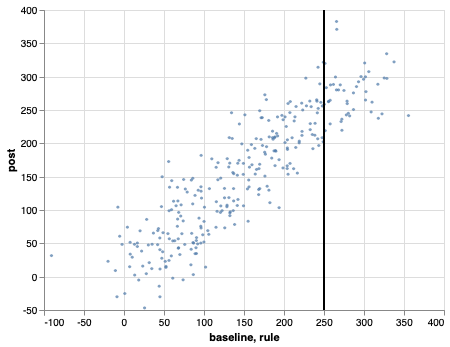

In [10]:
df = generate_data_frame()

# Plotting the data. Note the rule for baseline==250
c = alt.Chart(df).mark_circle(size=10).encode(
    alt.X('baseline'),
    alt.Y('post'))

rule = alt.Chart(df).mark_rule().encode(
    alt.X('rule'))

c+rule

count    3000.000000
mean        0.008834
std         2.407272
min        -8.131964
25%        -1.624384
50%        -0.002996
75%         1.665623
max         7.726649
dtype: float64

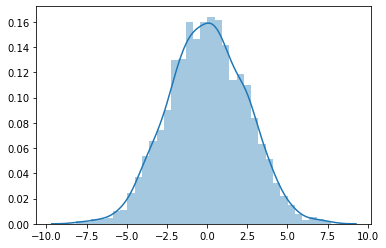

In [19]:
# First, let's examine the difference in means of the whole dataset
l = []
for x in range(3000):
    df = generate_data_frame()
    diff = df['post'].mean() - df['baseline'].mean()
    l.append(diff)
    
differences = pd.Series(l)

display(differences.describe())
display(sns.distplot(differences))

count    3000.000000
mean      -16.982512
std         5.439093
min       -35.162308
25%       -20.510855
50%       -17.093023
75%       -13.371119
max         4.559717
dtype: float64

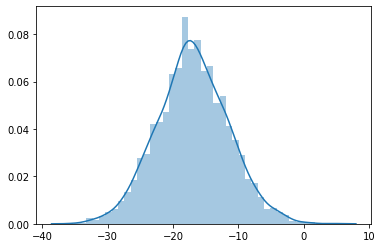

In [18]:
# Now, let's see the difference when we only examine the subset, baseline>250

l = []
for x in range(3000):
    df = generate_data_frame()
    df_mod = df[df['baseline'] > 250]
    diff = df_mod['post'].mean() - df_mod['baseline'].mean()
    l.append(diff)
    
differences = pd.Series(l)

display(differences.describe())
display(sns.distplot(differences))